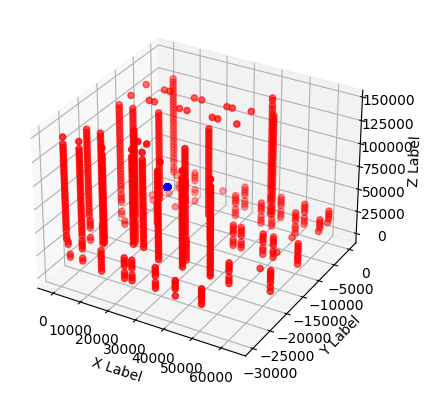

In [1]:
#Create a 3D plot given a csv file 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

#Read the csv file
data = pd.read_csv('canopyhousecols.csv')
data_etabs = pd.read_csv('selected_columns.csv')

#Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#Plot the data
ax.scatter(data['X'], data['Y'], data['Z Base'], c='r', marker='o')
ax.scatter(data_etabs['X'], data_etabs['Y'], data_etabs['Z Base'], c='b', marker='o')

#Set the labels
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

#Show the plot
plt.show()



In [ ]:
#Use shapely to create a plan view  based on the data 

from shapely.geometry import Polygon
from shapely.geometry import Point
import geopandas as gpd

#Create a polygon from the data, based on input of 'B' and 'H' the centrepoint is given in 'X', 'Y', 'Z Base', For circular use 'B" as the diameter and "Rectangle" use "B" as the width and "H" as the height
def create_polygon(data, shape):
    if shape == 'Circle':
        polygon = Polygon([[data['X'], data['Y']], [data['X']+data['B'], data['Y']], [data['X']+data['B'], data['Y']+data['B']], [data['X'], data['Y']+data['B']]])
    elif shape == 'Rectangle':
        polygon = Polygon([[data['X'], data['Y']], [data['X']+data['B'], data['Y']], [data['X']+data['B'], data['Y']+data['H']], [data['X'], data['Y']+data['H']]])
    else:
        print('Invalid shape')
    return polygon

#Create a geodataframe
gdf = gpd.GeoDataFrame(data, geometry=[create_polygon(data, 'Rectangle')])
gdf.crs = {'init': 'epsg:4326'}

#Plot the data
gdf.plot()

#Show the plot
plt.show()



ETABS PULL COORDINATES

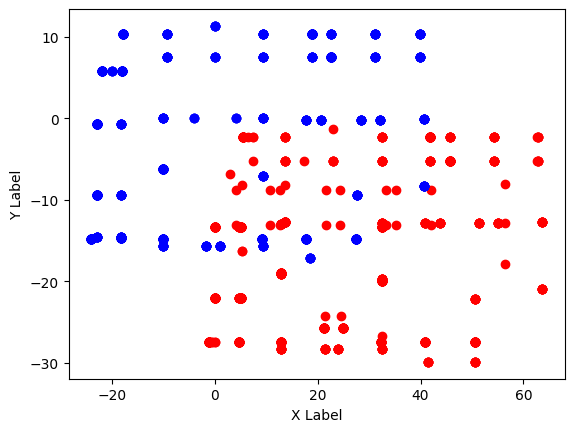

In [3]:
#createa a plot based on X and Y coordinates with similar Z values
fig = plt.figure()
ax = fig.add_subplot(111)

#Plot the data
ax.scatter(data['X']/1000, data['Y']/1000, c='r', marker='o')
ax.scatter(data_etabs['X'], data_etabs['Y'], c='b', marker='o')

#Set the labels
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')

#Show the plot
plt.show()



In [13]:
# create interactive plot
import plotly.express as px

fig = px.scatter_3d(data_etabs, x='X', y='Y', z='Z Base')
#add second plot for Etabs data
fig.add_scatter3d(x=data['X']/1000-22.99654, y=data['Y']/1000+12.68791, z=data['Z Base']/1000, mode='markers')

fig.show()



In [26]:
#Plot a 2D interactive plot
import plotly.express as px

fig = px.scatter(data_etabs, x='X', y='Y')
#add second plot for Etabs data
fig.add_scatter(x=data['X']/1000-22.99654, y=data['Y']/1000+12.68791, mode='markers')

fig.show()

